In [1]:
import pyemu
import os
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import shutil
import numpy as np
import sys

In [2]:
sys.path.insert(1, 'D:/spark/gits/apexmf')

In [12]:
from apexmf import apexmf_pst_viz
from apexmf.salt.salt_handler import SaltAnalysis
from apexmf.salt.analyzer import SaltAnalysis, SaltViz, get_stats

In [4]:
wd = "D:/spark/animas_amrs"
os.chdir(wd)

In [5]:
t_d = os.path.join(wd, "ies_template_pp")

In [7]:
# test run
pyemu.os_utils.run("pestpp-ies animas_amrs_pp_pre_rw.pst",cwd=t_d)

# Prior

In [ ]:
pst.pestpp_options['ies_num_reals'] = 100
pst.control_data.noptmax = -1
pst.write(os.path.join(template_ws,"animas_amrs_pp_pre_rw_prior.pst"))

In [11]:
num_workers = psutil.cpu_count(logical=False)

In [12]:
m_d = "main_diagonal_pp_pre_rw_prior_mc" 
pyemu.os_utils.start_workers(t_d,"pestpp-ies","animas_amrs_pp_pre_rw_prior.pst",
                            num_workers=num_workers,
                            worker_root='.',
                            master_dir=m_d)

In [13]:
pst = pyemu.Pst(os.path.join(m_d, 'animas_amrs_pp_pre_rw_prior.pst'))

In [15]:
pst.write_par_summary_table(filename='animas_amrs_pp_pre_rw_prior.pst')

type transform  count         initial value   
apex              apex     fixed     16        1E-05 to  3.17  \
aquf              aquf       log      3                    -5   
rivbot          rivbot     fixed      5                     5   
rivcd            rivcd       log      5               1.69897   
salt_ca0      salt_ca0       log     37               2.01703   
salt_cl0      salt_cl0       log     37               2.20412   
salt_co30    salt_co30       log     37               0.60206   
salt_hco30  salt_hco30       log     37               2.49415   
salt_k0        salt_k0       log     37               0.30103   
salt_mg0      salt_mg0       log     37               1.20412   
salt_na0      salt_na0       log     37               2.21748   
salt_so40    salt_so40       log     37               2.38021   
soil              soil       log     10  -0.728158 to 1.37475   

                   lower bound           upper bound      standard deviation  
apex            1E-05 to   1.5       0.0032 to   100       0.000225 to 24.75  
aquf                  -9.95861              -0.30103                 2.41439  
rivbot                     0.1                    10                   2.475  
rivcd                       -1                     2                    0.75  
salt_ca0             0.0170333               4.01703                       1  
salt_cl0               0.20412               4.20412                       1  
salt_co30             -1.39794               2.60206                       1  
salt_hco30            0.494155               4.49415                       1  
salt_k0               -1.69897               2.30103                       1  
salt_mg0              -0.79588               3.20412                       1  
salt_na0              0.217484               4.21748                       1  
salt_so40             0.380211               4.38021                       1  
soil        -1.02687 to 1.2833  -0.554396 to 1.45179  0.00821223 to 0.118119

In [16]:
obs_df = pd.read_csv(os.path.join(m_d,"animas_amrs_pp_pre_rw_prior.0.obs.csv"),index_col=0)

In [17]:
pst.try_parse_name_metadata()

In [18]:
obs = pst.observation_data.copy()

In [19]:
obs

obsnme  obsval  weight    obgnme  oname  otype   
obsnme                                                                         
d009_cca_19961119  d009_cca_19961119   52.40     0.0  d009_cca    NaN    NaN  \
d009_cca_19970108  d009_cca_19970108   56.10     0.0  d009_cca    NaN    NaN   
d009_cca_19970130  d009_cca_19970130   69.20     0.0  d009_cca    NaN    NaN   
d009_cca_19970225  d009_cca_19970225   60.10     0.0  d009_cca    NaN    NaN   
d009_cca_19970325  d009_cca_19970325   44.80     0.0  d009_cca    NaN    NaN   
...                              ...     ...     ...       ...    ...    ...   
str_075_201108        str_075_201108    7.72     1.0   str_075    NaN    NaN   
str_075_201109        str_075_201109    5.67     1.0   str_075    NaN    NaN   
str_075_201110        str_075_201110    9.58     1.0   str_075    NaN    NaN   
str_075_201111        str_075_201111   10.83     1.0   str_075    NaN    NaN   
str_075_201112        str_075_201112    7.76     1.0   str_075    NaN    NaN   

                   usecol  time   i   j  totim  
obsnme                                          
d009_cca_19961119     NaN   NaN NaN NaN    NaN  
d009_cca_19970108     NaN   NaN NaN NaN    NaN  
d009_cca_19970130     NaN   NaN NaN NaN    NaN  
d009_cca_19970225     NaN   NaN NaN NaN    NaN  
d009_cca_19970325     NaN   NaN NaN NaN    NaN  
...                   ...   ...  ..  ..    ...  
str_075_201108        NaN   NaN NaN NaN    NaN  
str_075_201109        NaN   NaN NaN NaN    NaN  
str_075_201110        NaN   NaN NaN NaN    NaN  
str_075_201111        NaN   NaN NaN NaN    NaN  
str_075_201112        NaN   NaN NaN NaN    NaN  

[5403 rows x 11 columns]

In [21]:
pr_oe = pyemu.ObservationEnsemble.from_csv(
    pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_pre_rw_prior.0.obs.csv")
    )
# pt_oe = pyemu.ObservationEnsemble.from_csv(pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_pre_rw_prior.{0}.obs.csv".format(pst.control_data.noptmax)))


<Figure size 800x1050 with 0 Axes>

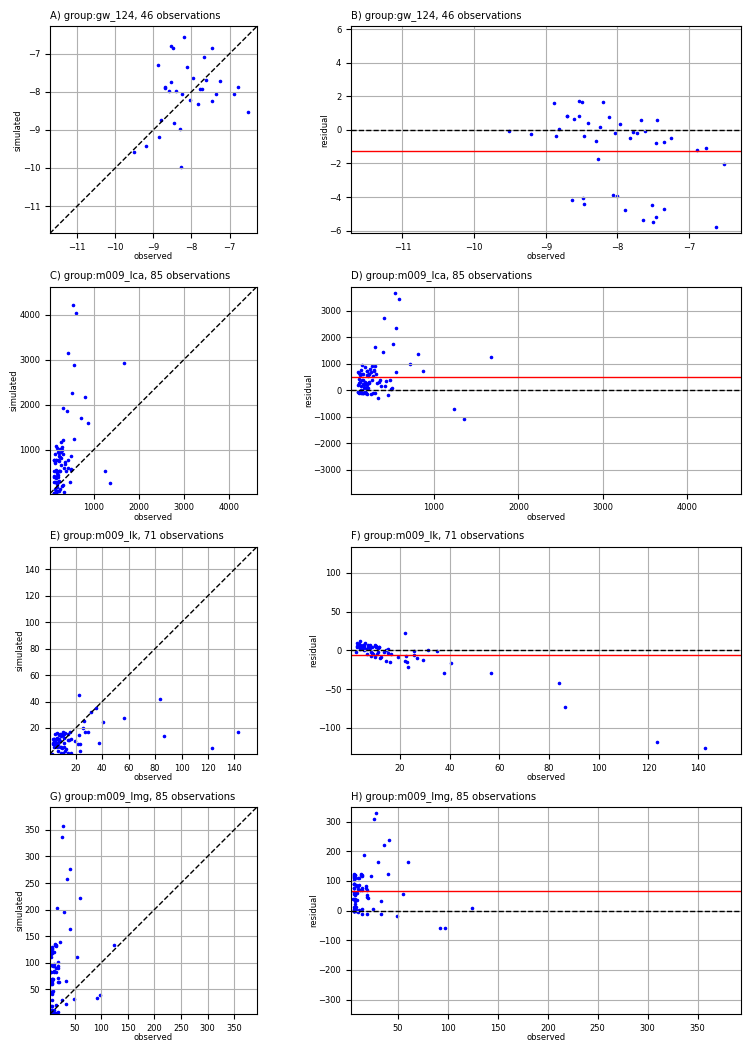

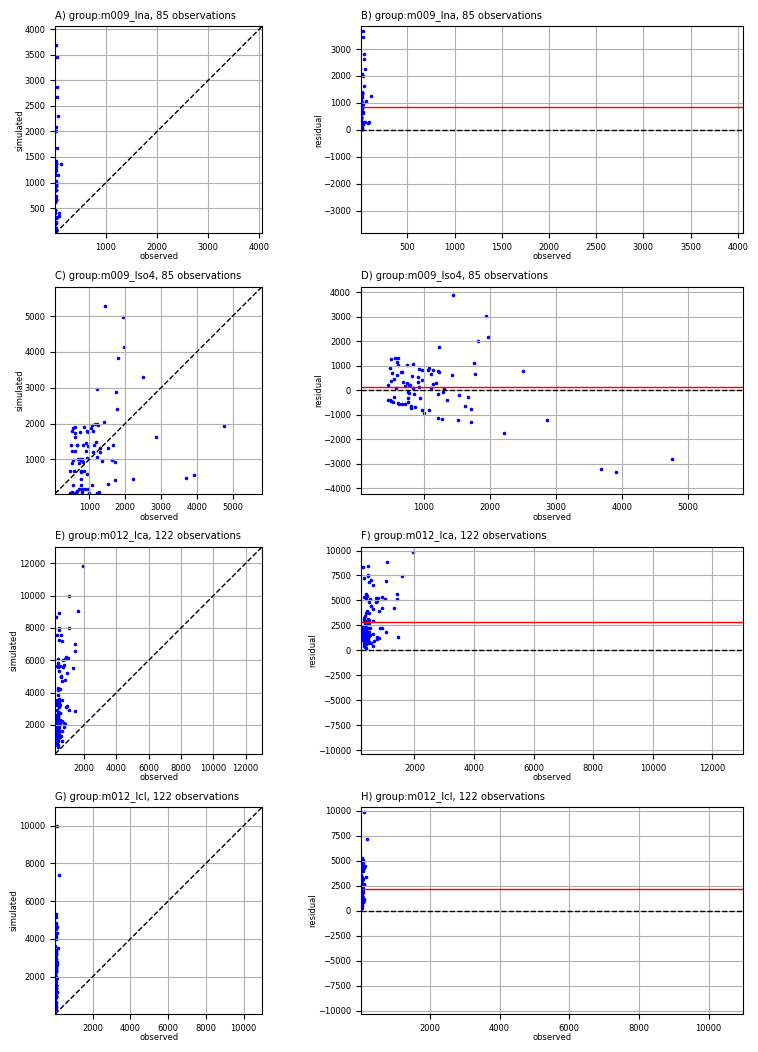

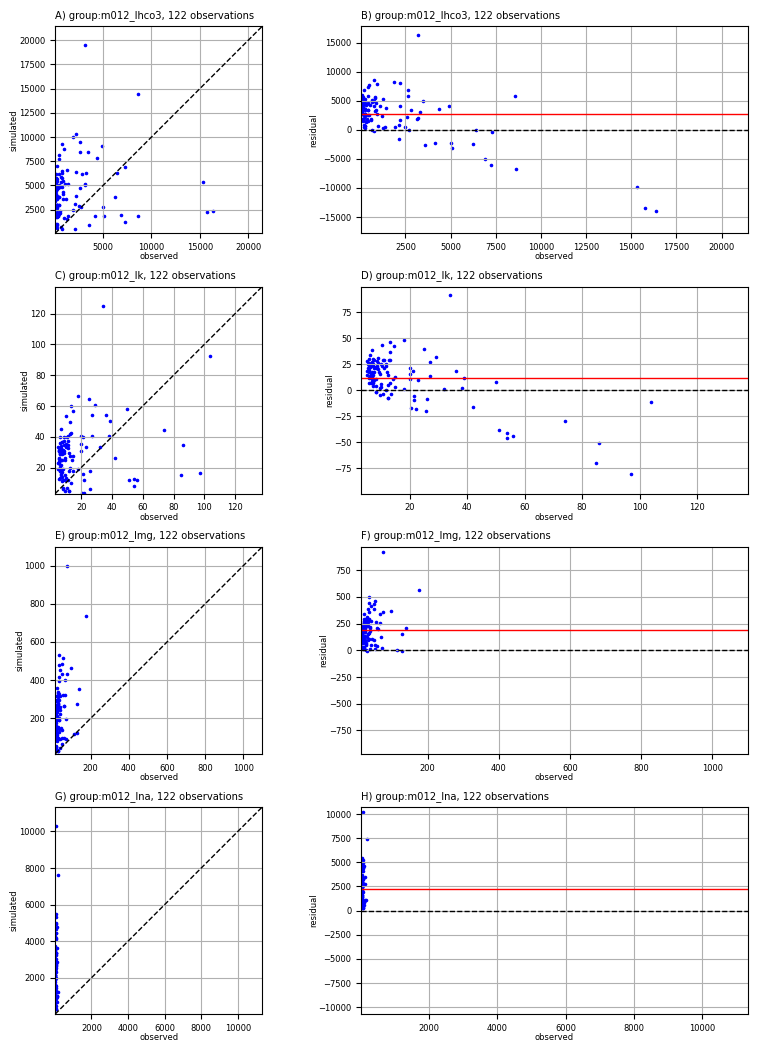

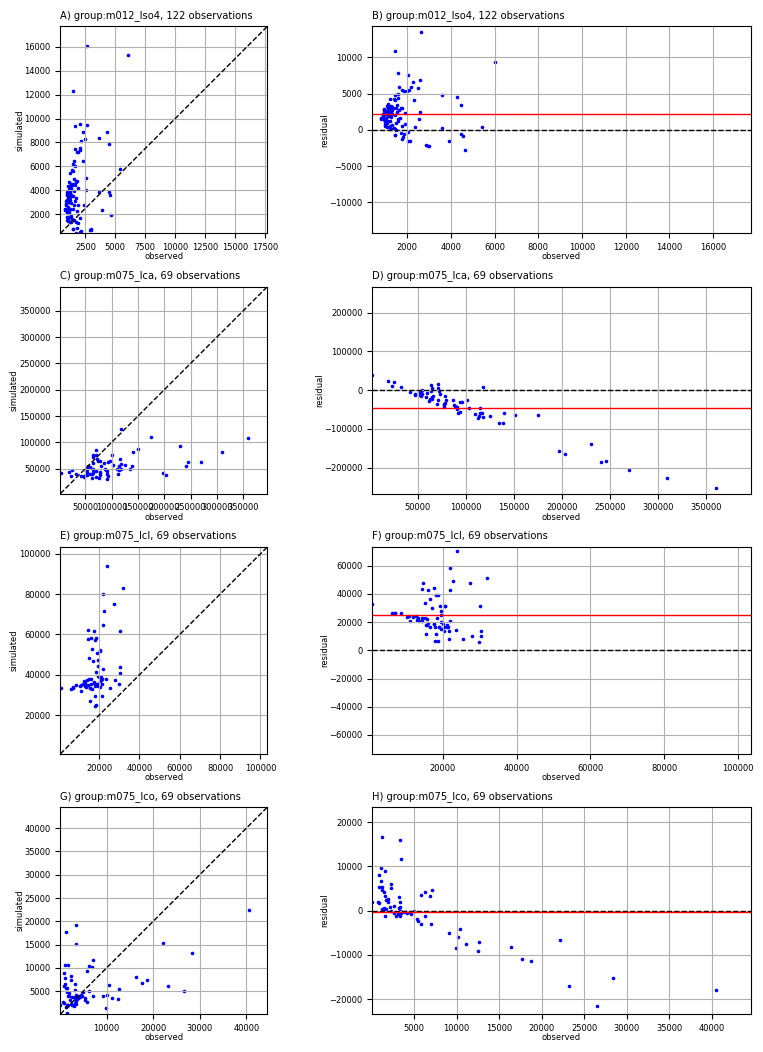

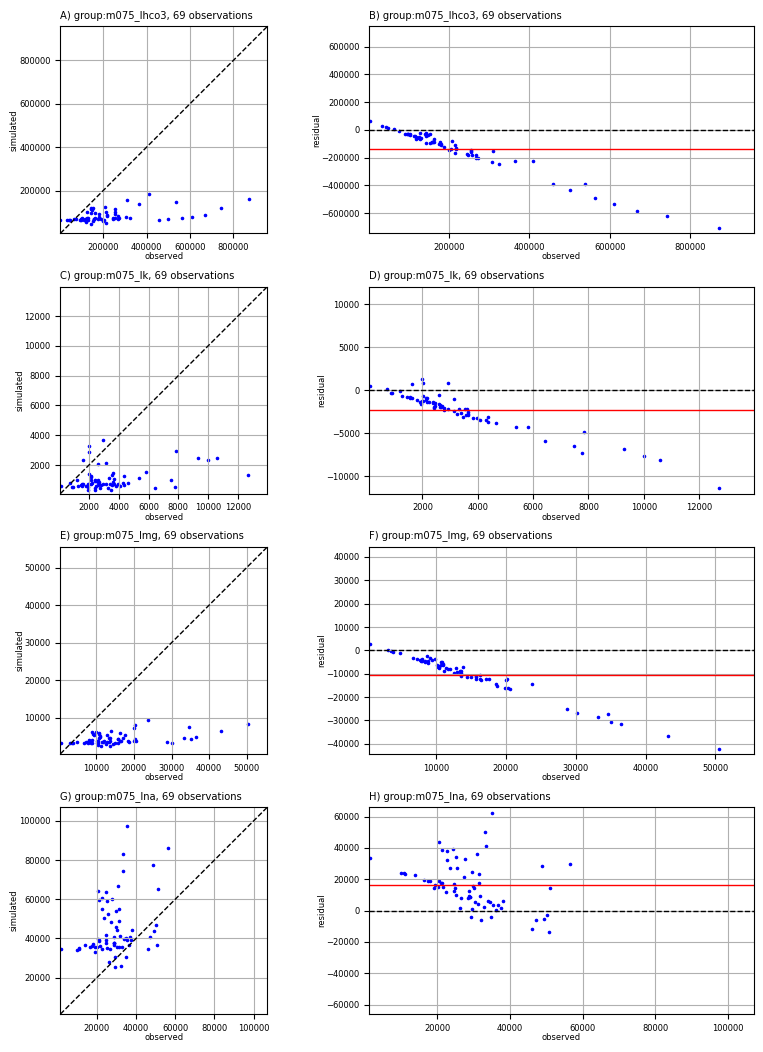

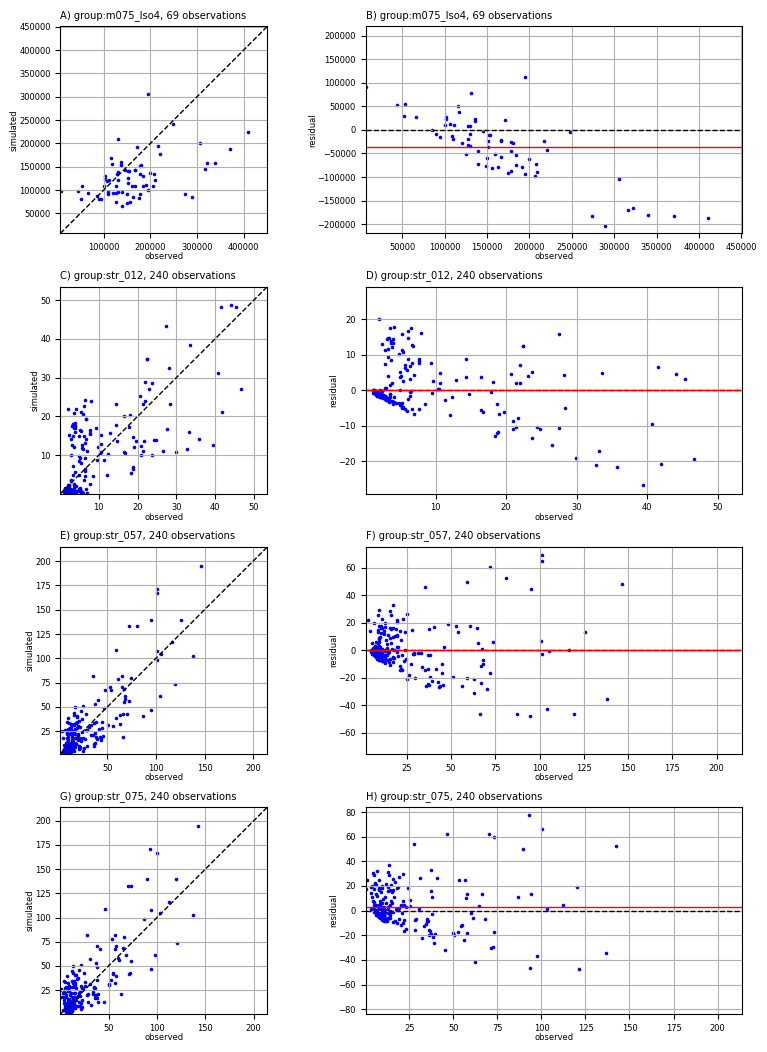

In [22]:
pyemu.plot_utils.res_1to1(pst);

In [41]:
def plot_tseries_prior_ensembles(pr_oe, dot=True):
    pst.try_parse_name_metadata()
    # get the observation data from the control file and select 
    obs = pst.observation_data.copy()
    obs = obs.loc[obs.obgnme.apply(lambda x: x in pst.nnz_obs_groups),:]
    # --- time control ---
    time_col = []
    for i in range(len(obs)):
        if obs.iloc[i, 0][0] == "g":
            time_col.append(obs.iloc[i, 0][-8:])
        else:
            time_col.append(obs.iloc[i, 0][-6:])
    obs['time'] = time_col
    # ---------------------
    ogs = obs.obgnme.unique()
    fig,axes = plt.subplots(len(ogs),1,figsize=(10,4*len(ogs)))
    ogs.sort()
    # for each observation group (i.e. timeseries)
    for ax,og in zip(axes,ogs):
        # get values for x axis
        oobs = obs.loc[obs.obgnme==og,:].copy()
        oobs.loc[:,"time"] = oobs.time.astype(str)
#         oobs.sort_values(by="time",inplace=True)
        tvals = oobs.time.values
        onames = oobs.obsnme.values
        if dot is True:
            # plot prior
            [ax.scatter(tvals,pr_oe.loc[i,onames].values,color="gray",s=30, alpha=0.2) for i in pr_oe.index]
            # plot posterior
#             [ax.scatter(tvals,pt_oe.loc[i,onames].values,color='b',s=30,alpha=0.2) for i in pt_oe.index]
            # plot measured+noise 
            oobs = oobs.loc[oobs.weight>0,:]
            tvals = oobs.time.values
            onames = oobs.obsnme.values
    #         [ax.plot(tvals,noise.loc[i,onames].values,"r",lw=0.5,alpha=0.5) for i in noise.index]
            ax.scatter(oobs.time,oobs.obsval,color='red',s=30).set_facecolor("none")
        if dot is False:
            # plot prior
            [ax.plot(tvals,pr_oe.loc[i,onames].values,"0.5",lw=0.5,alpha=0.5) for i in pr_oe.index]
            # plot posterior
#             [ax.plot(tvals,pt_oe.loc[i,onames].values,"b",lw=0.5,alpha=0.5) for i in pt_oe.index]
            # plot measured+noise 
            oobs = oobs.loc[oobs.weight>0,:]
            tvals = oobs.time.values
            onames = oobs.obsnme.values
    #         [ax.plot(tvals,noise.loc[i,onames].values,"r",lw=0.5,alpha=0.5) for i in noise.index]
            ax.plot(oobs.time,oobs.obsval,"r-",lw=2)
        ax.tick_params(axis='x', labelrotation=90)
        ax.margins(x=0.01)
        ax.set_title(og,loc="left")
    fig.tight_layout()
    return fig    

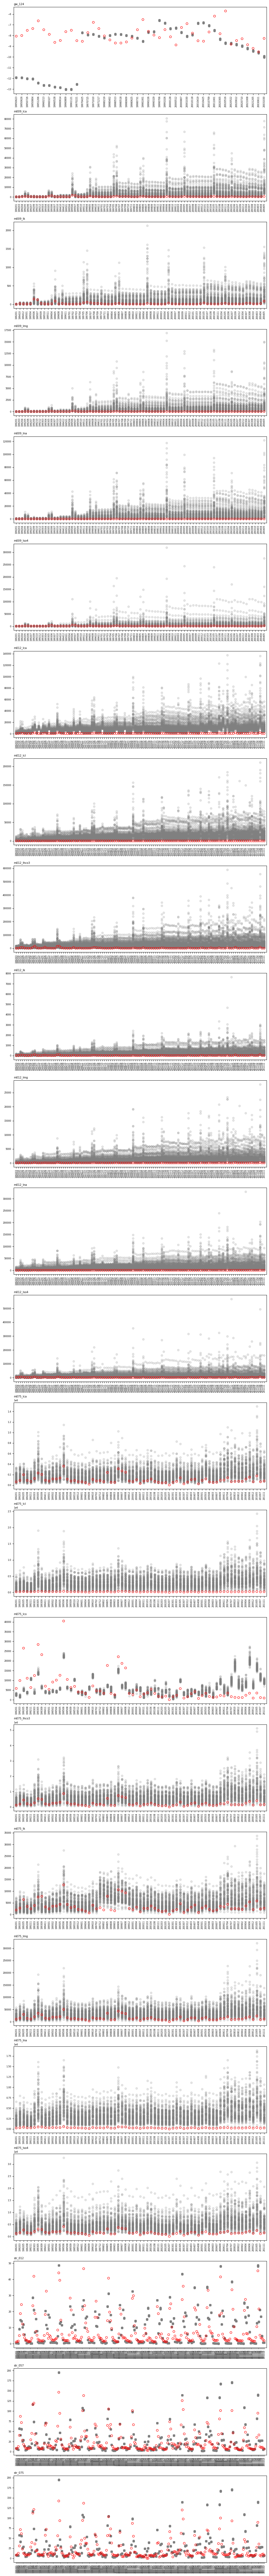

In [42]:
fig = plot_tseries_prior_ensembles(pr_oe, dot=True)

# Posterior

In [9]:
m_d = os.path.join('main_ies_1_pp_pre_rw_ies')

In [43]:
pyemu.os_utils.start_workers(t_d, # the folder which contains the "template" PEST dataset
                            'pestpp-ies', #the PEST software version we want to run
                            'animas_amrs_pp_pre_rw_ies.pst', # the control file to use with PEST
                            num_workers=num_workers, #how many agents to deploy
                            worker_root='.', #where to deploy the agent directories; relative to where python is running
                            master_dir=m_d, #the manager directory
                            )

In [44]:
pst = pyemu.Pst(os.path.join(m_d,'animas_amrs_pp_pre_rw_ies.pst'))

In [46]:
pr_oe = pyemu.ObservationEnsemble.from_csv(
    pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_pre_rw_ies.0.obs.csv")
    )
pt_oe = pyemu.ObservationEnsemble.from_csv(pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_pre_rw_ies.{0}.obs.csv".format(pst.control_data.noptmax)))


<Figure size 800x1050 with 0 Axes>

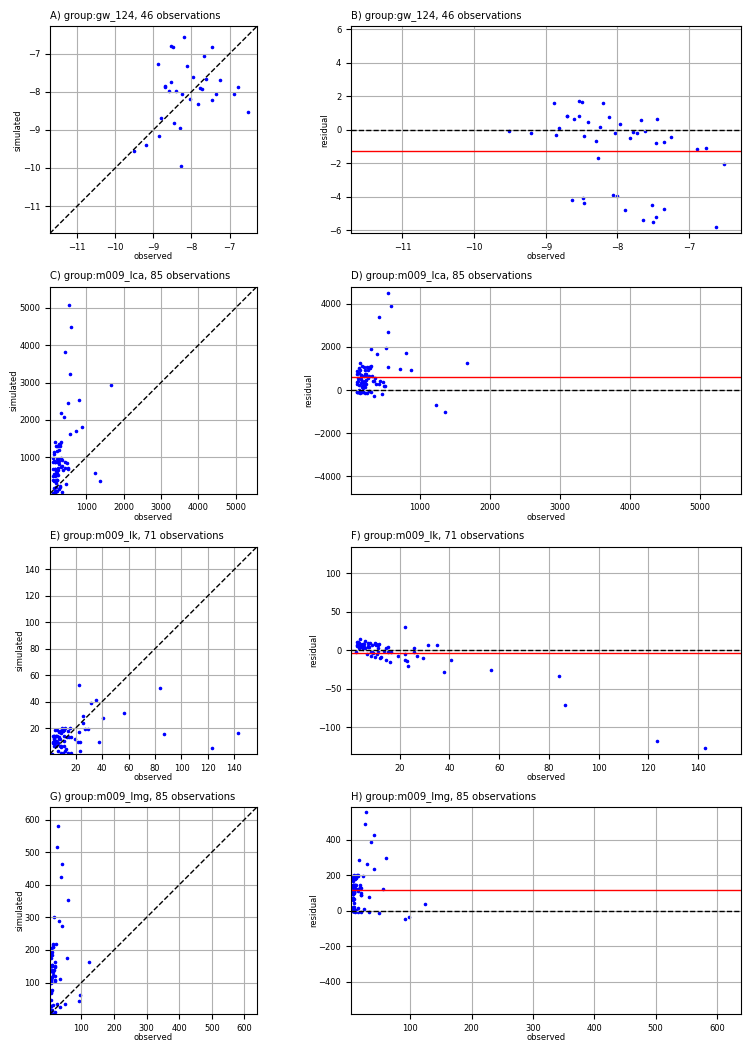

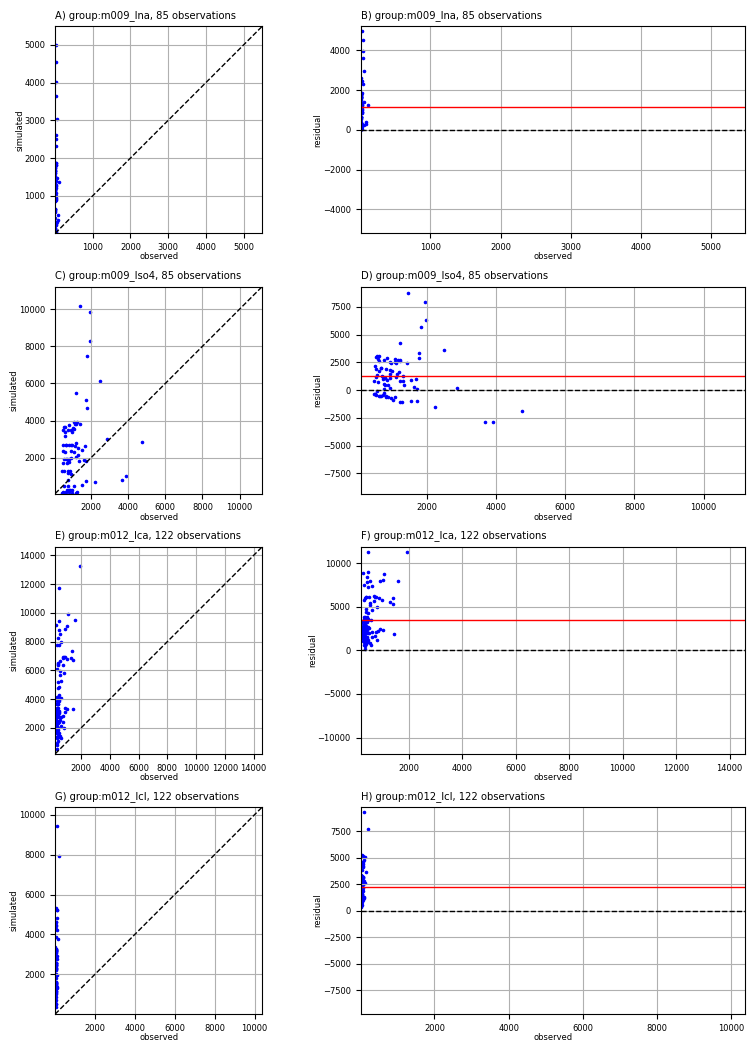

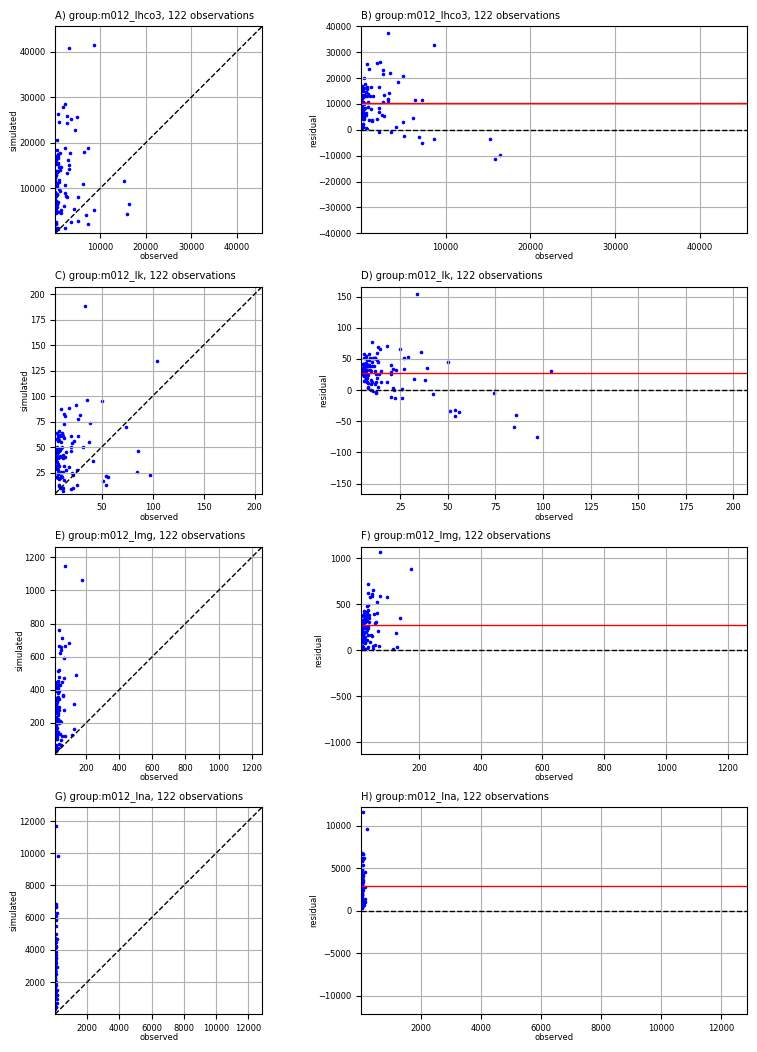

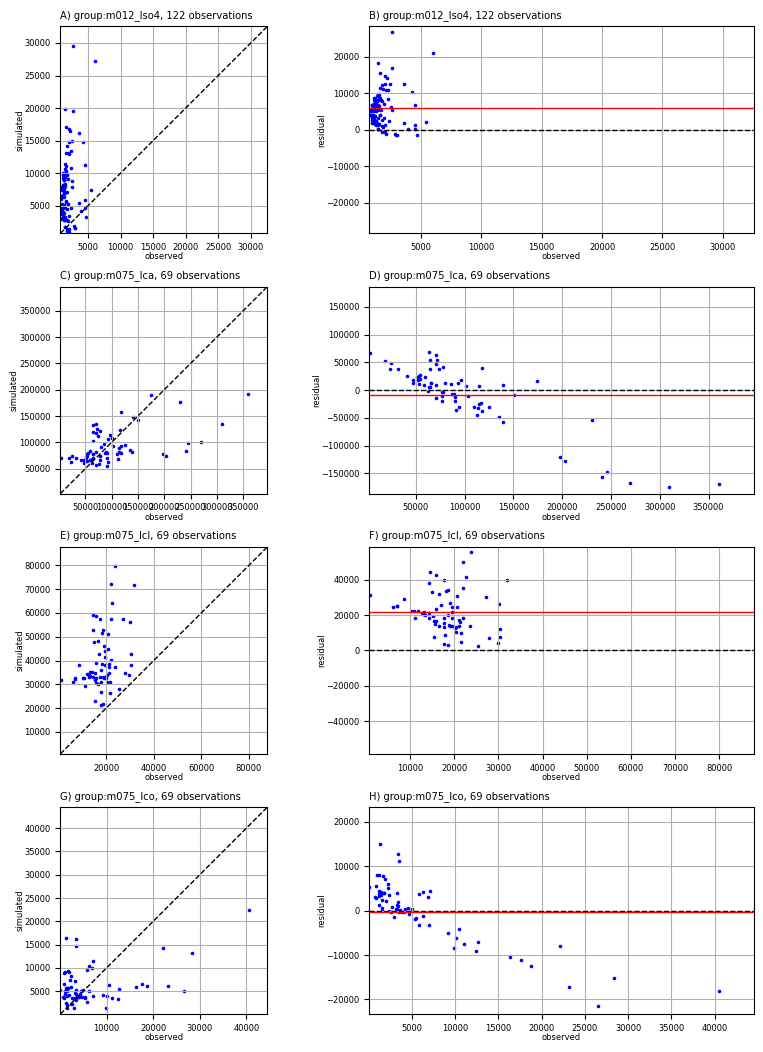

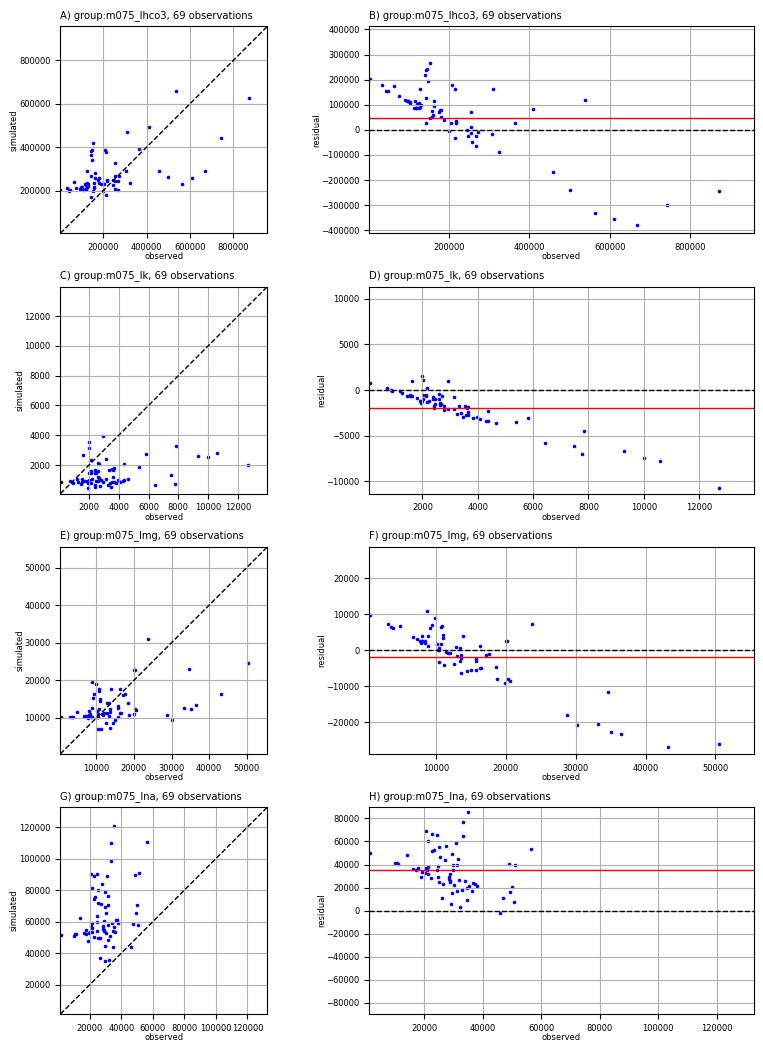

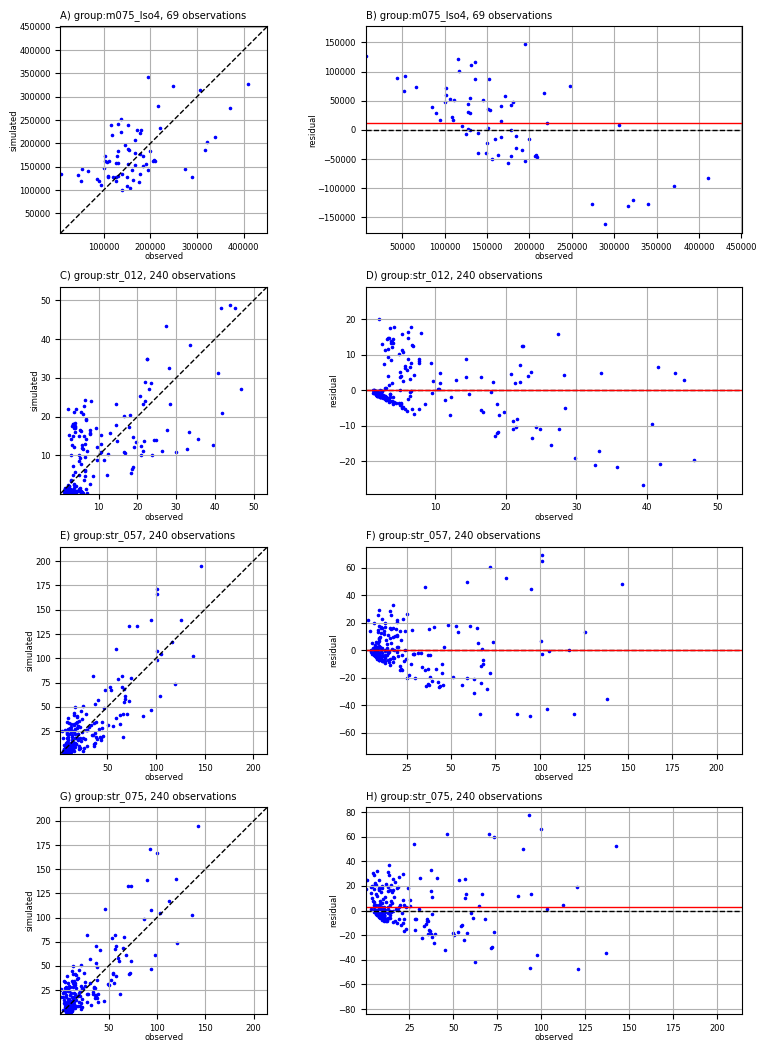

In [47]:
pyemu.plot_utils.res_1to1(pst);

In [48]:
pt_oe.phi_vector

real_name
1       2.245436e+12
3       2.333415e+12
4       2.203570e+12
6       2.419497e+12
7       2.735049e+12
            ...     
292     2.210660e+12
293     2.251907e+12
294     2.144314e+12
298     2.386124e+12
base    2.176106e+12
Length: 201, dtype: float64

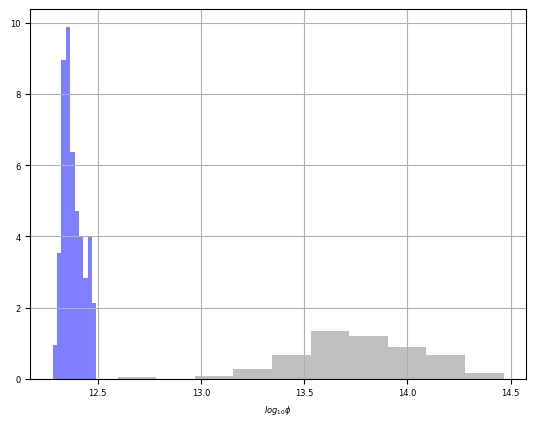

In [49]:
fig,ax = plt.subplots(1,1)
pr_oe.phi_vector.apply(np.log10).hist(ax=ax,fc="0.5",ec="none",alpha=0.5,density=True)
pt_oe.phi_vector.apply(np.log10).hist(ax=ax,fc="b",ec="none",alpha=0.5,density=True)
_ = ax.set_xlabel("$log_{10}\\phi$")

In [17]:
obs = obs.loc[obs.obgnme.apply(lambda x: x in pst.nnz_obs_groups),:]

In [18]:
obs

obsnme  obsval    weight    obgnme  oname  otype   
obsnme                                                                       
m009_lca_199201  m009_lca_199201  104.00  0.129022  m009_lca    NaN    NaN  \
m009_lca_199203  m009_lca_199203  114.00  0.129022  m009_lca    NaN    NaN   
m009_lca_199204  m009_lca_199204  232.00  0.129022  m009_lca    NaN    NaN   
m009_lca_199205  m009_lca_199205  480.00  0.129022  m009_lca    NaN    NaN   
m009_lca_199206  m009_lca_199206  457.00  0.129022  m009_lca    NaN    NaN   
...                          ...     ...       ...       ...    ...    ...   
str_075_201108    str_075_201108    7.72  0.884858   str_075    NaN    NaN   
str_075_201109    str_075_201109    5.67  0.884858   str_075    NaN    NaN   
str_075_201110    str_075_201110    9.58  0.884858   str_075    NaN    NaN   
str_075_201111    str_075_201111   10.83  0.884858   str_075    NaN    NaN   
str_075_201112    str_075_201112    7.76  0.884858   str_075    NaN    NaN   

                 usecol  time   i   j  totim  
obsnme                                        
m009_lca_199201     NaN   NaN NaN NaN    NaN  
m009_lca_199203     NaN   NaN NaN NaN    NaN  
m009_lca_199204     NaN   NaN NaN NaN    NaN  
m009_lca_199205     NaN   NaN NaN NaN    NaN  
m009_lca_199206     NaN   NaN NaN NaN    NaN  
...                 ...   ...  ..  ..    ...  
str_075_201108      NaN   NaN NaN NaN    NaN  
str_075_201109      NaN   NaN NaN NaN    NaN  
str_075_201110      NaN   NaN NaN NaN    NaN  
str_075_201111      NaN   NaN NaN NaN    NaN  
str_075_201112      NaN   NaN NaN NaN    NaN  

[2734 rows x 11 columns]

In [50]:
def plot_tseries_ensembles(
                    pr_oe, pt_oe, dot=True,
#                     onames=["hds","sfr"]
                    ):
    pst.try_parse_name_metadata()
    # get the observation data from the control file and select 
    obs = pst.observation_data.copy()
    obs = obs.loc[obs.obgnme.apply(lambda x: x in pst.nnz_obs_groups),:]
    # --- time control ---
    time_col = []
    for i in range(len(obs)):
        if obs.iloc[i, 0][0] == "g":
            time_col.append(obs.iloc[i, 0][-8:])
        else:
            time_col.append(obs.iloc[i, 0][-6:])
    obs['time'] = time_col
    # ---------------------
#     # onames provided in oname argument
#     obs = obs.loc[obs.oname.apply(lambda x: x in onames)]
    # only non-zero observations
#     obs = obs.loc[obs.obgnme.apply(lambda x: x in pst.nnz_obs_groups),:]
    # make a plot
    ogs = obs.obgnme.unique()
    fig,axes = plt.subplots(len(ogs),1,figsize=(10,4*len(ogs)))
    ogs.sort()
    # for each observation group (i.e. timeseries)
    for ax,og in zip(axes,ogs):
        # get values for x axis
        oobs = obs.loc[obs.obgnme==og,:].copy()
        oobs.loc[:,"time"] = oobs.time.astype(str)
#         oobs.sort_values(by="time",inplace=True)
        tvals = oobs.time.values
        onames = oobs.obsnme.values
        if dot is True:
            # plot prior
            [ax.scatter(tvals,pr_oe.loc[i,onames].values,color="gray",s=30, alpha=0.2) for i in pr_oe.index]
            # plot posterior
            [ax.scatter(tvals,pt_oe.loc[i,onames].values,color='b',s=30,alpha=0.2) for i in pt_oe.index]
            # plot measured+noise 
            oobs = oobs.loc[oobs.weight>0,:]
            tvals = oobs.time.values
            onames = oobs.obsnme.values
    #         [ax.plot(tvals,noise.loc[i,onames].values,"r",lw=0.5,alpha=0.5) for i in noise.index]
            ax.scatter(oobs.time,oobs.obsval,color='red',s=30).set_facecolor("none")
        if dot is False:
            # plot prior
            [ax.plot(tvals,pr_oe.loc[i,onames].values,"0.5",lw=0.5,alpha=0.5) for i in pr_oe.index]
            # plot posterior
            [ax.plot(tvals,pt_oe.loc[i,onames].values,"b",lw=0.5,alpha=0.5) for i in pt_oe.index]
            # plot measured+noise 
            oobs = oobs.loc[oobs.weight>0,:]
            tvals = oobs.time.values
            onames = oobs.obsnme.values
    #         [ax.plot(tvals,noise.loc[i,onames].values,"r",lw=0.5,alpha=0.5) for i in noise.index]
            ax.plot(oobs.time,oobs.obsval,"r-",lw=2)
        ax.tick_params(axis='x', labelrotation=90)
        ax.margins(x=0.01)
        ax.set_title(og,loc="left")
    fig.tight_layout()
    return fig

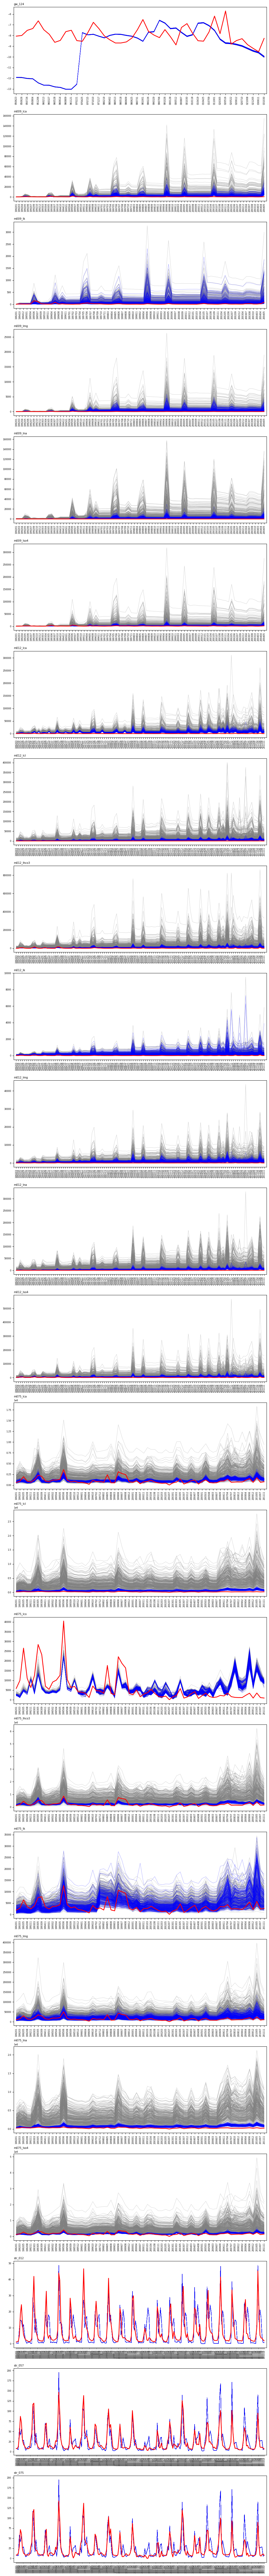

In [52]:
fig = plot_tseries_ensembles(pr_oe, pt_oe, dot=False)

In [53]:
os.getcwd()

'D:\\spark\\animas_amrs'

In [54]:
pst.parrep(parfile=os.path.join(m_d, 'animas_amrs_pp_pre_rw_ies.7.base.par'))

Updating parameter values from main_diagonal_pp_pre_rw_prior_mc\animas_amrs_pp_pre_rw_ies.7.base.par
parrep: updating noptmax to 0


In [55]:
# updates the model input files with parameter values
pst.write_input_files(pst_path=m_d)

In [67]:
os.getcwd()

'D:\\spark\\animas_amrs\\main_diagonal_pp_pre_rw_prior_mc'

In [60]:
# run the model forward run; this applies all the multipler paarameters, executes MODFLOW6 and MODPATH7 and then postprocess observations
os.chdir(m_d)
pyemu.os_utils.run('python salt_forward_run.py')

In [4]:
cali_wd = "D:/spark/animas_amrs/main_diagonal_pp_pre_rw_prior_mc"

In [5]:
os.chdir(cali_wd)

In [6]:
def salt_viz(model, salt_df, subs):
    for i in subs:
        print(f"{'= = '*3}sub{i:03d} {'= = '*3}")
        sim_df = model.read_salt_sim_cha(salt_df, i, sim_start, cal_start, cal_end).resample('M').mean()
        obd_df = model.read_salt_obd_cha(i, time_step='mon')
        obd_df = obd_df[~obd_df.index.duplicated(keep='first')]    
        for o in obd_df.columns:
            comdf = model.sim_obd_df(sim_df, o, obd_df, o)
            print(o)
            print(get_stats(comdf['1/1/1992':'12/31/2011']))
            fig, ax = plt.subplots(1, 2, figsize=(12, 2), gridspec_kw={'width_ratios': [6, 1]})
            SaltViz(comdf['1/1/1992':'12/31/2011']).hydro_sim_obd02(ax[0])
            SaltViz(comdf['1/1/1992':'12/31/2011']).reg_line02(ax[1])
            fig.tight_layout()
            plt.show()

In [13]:
m_test = SaltAnalysis(cali_wd)
salt_test = m_test.load_salt_cha_result()

In [14]:
sim_start = '1/1/1987'
cal_start = '1/1/1992'
cal_end = '12/31/2011'

= = = = = = sub075 = = = = = = 
load_so4
(0.2248, 66077.9463, -7.1243, 0.2942)


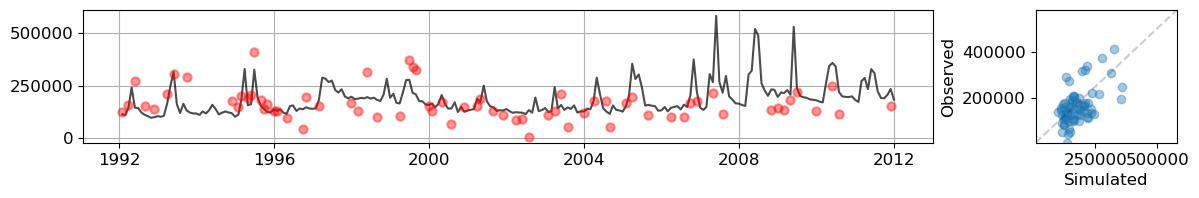

load_na
(-12.761, 38582.5939, -119.671, 0.0923)


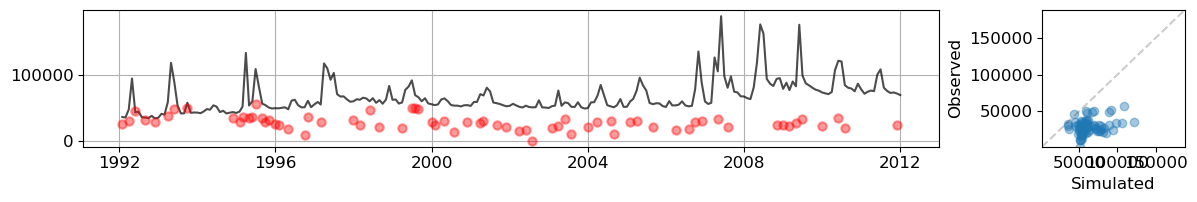

load_k
(-0.5199, 2926.1896, 51.2543, 0.0981)


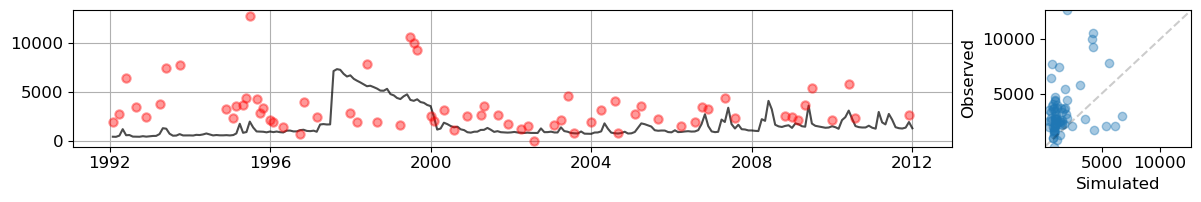

load_mg
(0.1445, 8600.1977, 12.1413, 0.1833)


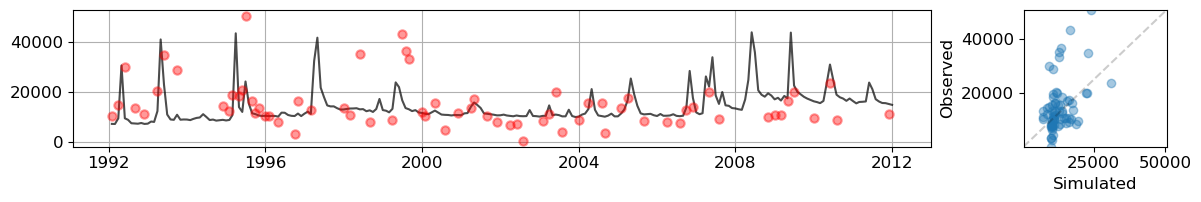

load_cl
(-15.2799, 23881.8524, -116.9209, 0.139)


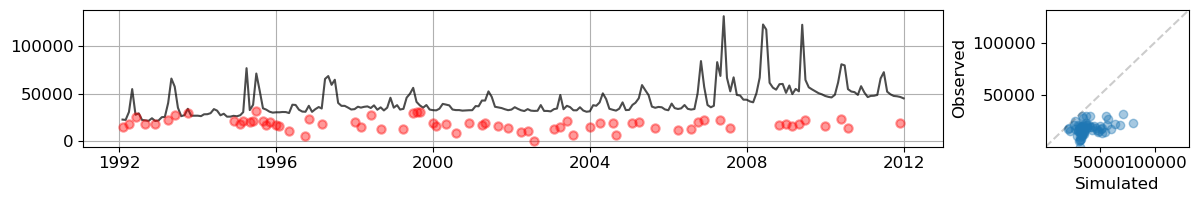

load_co3
(0.1381, 6974.7234, 7.2573, 0.1627)


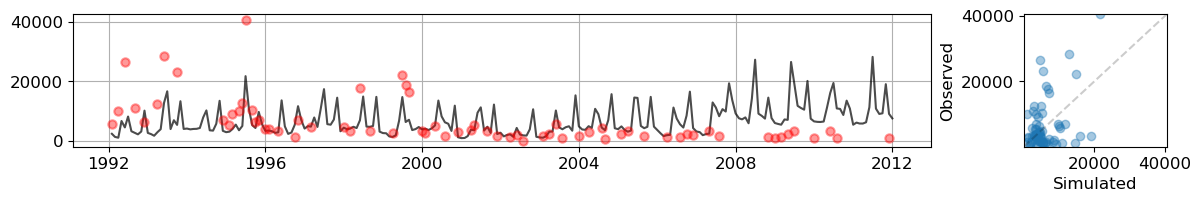

load_ca
(0.2558, 57875.243, 9.9499, 0.2814)


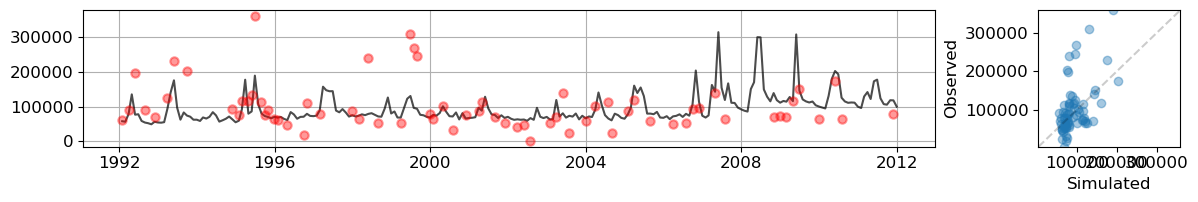

load_hco3
(0.2624, 144013.9345, -20.5658, 0.338)


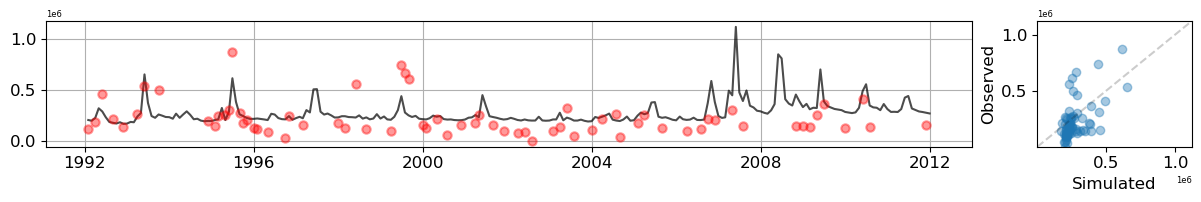

In [15]:
salt_viz(m_test, salt_test, [75])

In [16]:
os.getcwd()

'D:\\spark\\animas_amrs\\main_diagonal_pp_pre_rw_prior_mc'

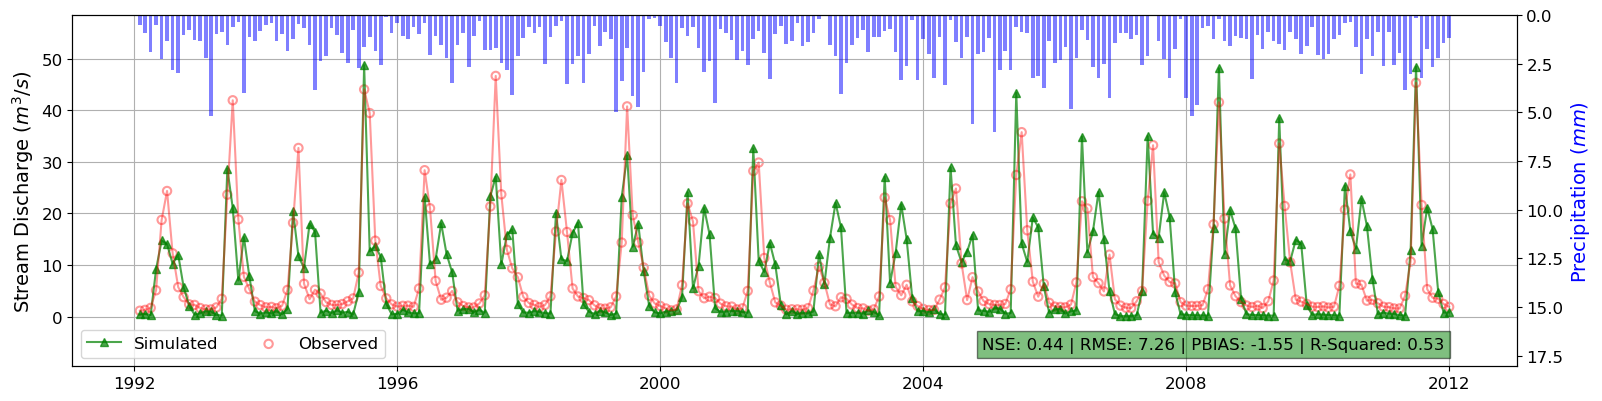

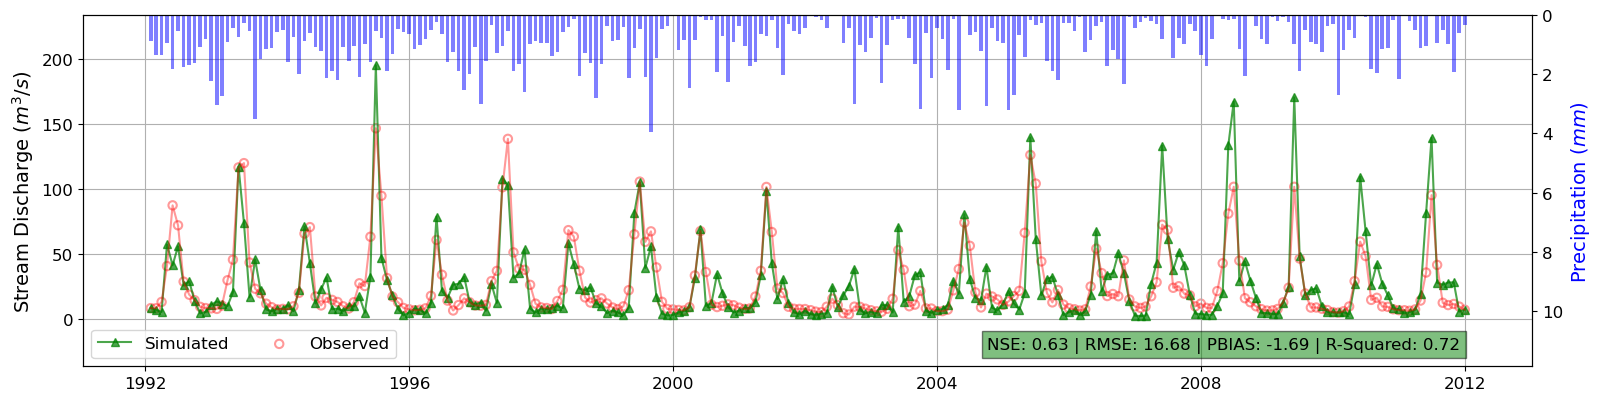

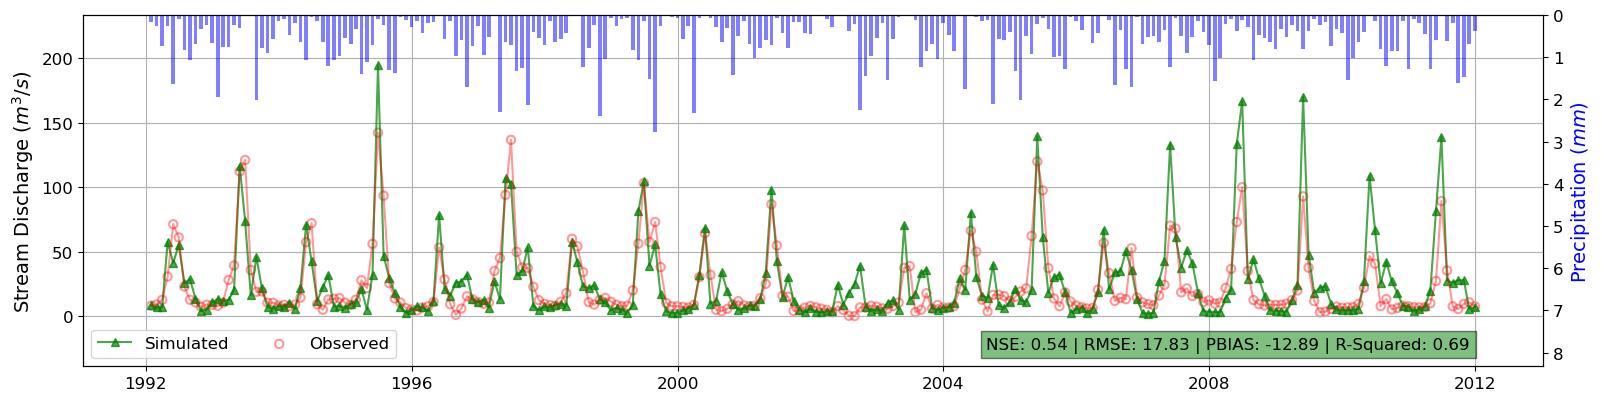

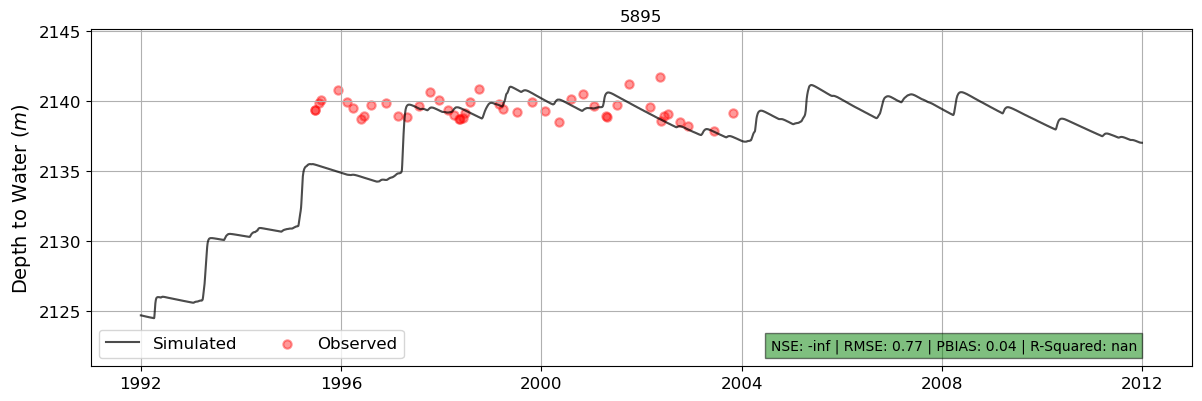

In [17]:

str_dic = {12:'str_012', 57:'str_057', 75:'str_075'}
for sim, obd in str_dic.items():
    pdf = apexmf_pst_viz.stf_df('SITE75.RCH', '1/1/1987', sim, obd, time_step='M')
    apexmf_pst_viz.stf_plot(pdf['1/1/1992':'12/31/2011'])
#     apexmf_pst_viz.str_plot(pdf['1/1/2010':'12/31/2019'])
mf_dic = {5895:'wt_gw_124'}
for sim, obd in mf_dic.items():
    mfdf = apexmf_pst_viz.wt_df('1/1/1987', sim, obd, prep_sub=75)
    # apexmf_pst_viz.wt_plot(mfdf['1/1/2010':'12/31/2019'])
    apexmf_pst_viz.wt_plot(mfdf['1/1/1992':'12/31/2011'])

In [63]:
os.getcwd()

'D:\\spark\\animas_amrs\\ies_template_pp'